# Table Q-Learning CartPole

This notebook contains the necessary parts for the implementation of table Q-learning for the CartPole environment. 

### Import libraries 

In [68]:
import gym
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initialize environment

In [30]:
env = gym.make('CartPole-v0')
state = env.reset()

### Set necessary environment parameters

In [40]:
# Number of discrete states (bucket) per state dimension
n_bucket = (1, 1, 6, 3)  # (x, dot x, theta, dot theta)

# Number of discrete actions
n_actions = env.action_space.n # (left, right)

# Bounds for each discrete state
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))

# Limit the velocity bounds
state_bounds[1] = [-0.5, 0.5]
state_bounds[3] = [-math.radians(50), math.radians(50)]

# Index of the action
action_index = len(n_bucket)

# Creating a Q-table for each state-action pair
q_table = np.zeros(n_bucket+(n_actions,))

### Discretizing the states into buckets

In order to make a table, we need to discretize our continous state variables. This is done with the function ```state_to_bucket()```. 

In [32]:
def state_to_bucket(state):
    
    bucket_indices = []
    for i in range(len(state)):
        if state[i] <= state_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_bounds[i][1]:
            bucket_index = n_bucket[i]-1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = state_bounds[i][1]-state_bounds[i][0]
            position = (n_bucket[i]-1)*(state[i]-state_bounds[i][0])/bound_width
            bucket_index = int(round(position))
        bucket_indices.append(bucket_index)
        
    return tuple(bucket_indices)

### Selecting an action given the state

In [38]:
def select_action(state, explore_rate):
    
    if random.random() < explore_rate: # Select a random action
        action = env.action_space.sample()
    else: # Select the action with the highest q
        action = np.argmax(q_table[state])
        
    return action

In [41]:
select_action(state, explore_rate=0.5)

0

### Learning and exploration rate decay

In order to decrease the learning and exploration as the Q-learner gets better and better we use a decay function accoring to the following. 

In [60]:
epsilon_min = 0.1
def get_rate(e, type='log'):

    if type == 'log':
        epsilon = max(epsilon_learn_min, min(0.5, 1.0-math.log10((e+1)/25)))
    else:
        raise ValueError('Learning rate does not exist.')

    return epsilon

In [81]:
episode = range(300)
epsilon = np.array([])
for e in episode:
    epsilon = np.append(epsilon, get_learning_rate(e, type='log'))

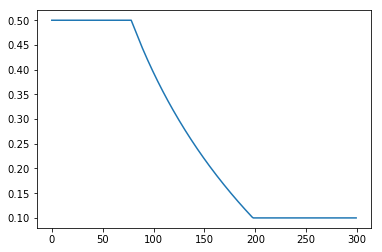

In [82]:
plt.plot(episode, epsilon)

In [83]:
q_table.size

36

In [85]:
if 0 < q_table.size:
    print('pelle')

pelle


In [86]:
Q_table = np.array([])
Q_table.size

0

In [87]:
q_table = np.zeros(n_bucket+(n_actions,))

In [90]:
np.tensordot(q_table, q_table)

ValueError: shape-mismatch for sum